# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [11]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [23]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size) 
        self.bias =np.random.rand() 

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs) 

                # Calcular el error
                diferencia = Y_train[i] - prediction
                error = diferencia ** 2## a completar con el error cuadratico medio
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum = train_error_acum / X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs)

                diferencia = Y_validation[i] - prediction
                error =diferencia ** 2
                val_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_acum = val_error_acum / X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [24]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 6000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

# Generar datos aleatorios
X_data = np.random.randint(0, 2, size=(N_samples, N_inputs))
Y_data = np.prod(X_data, axis=1)

# Dividir datos en entrenamiento, validación y prueba
X_train = X_data[:5000]
Y_train = Y_data[:5000]

X_validation = X_data[5000:5500]
Y_validation = Y_data[5000:5500]

X_test = X_data[5500:]
Y_test = Y_data[5500:]

# Visualizar algunas muestras
print("X_train (first 5 samples):")
print(X_train[:5])

print("Y_train (first 5 samples):")
print(Y_train[:5])


X_train (first 5 samples):
[[0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]]
Y_train (first 5 samples):
[0 0 1 0 1]


In [25]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [26]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 1]
Probabilidad: 0.9231235078626289
Prediction: 1


In [27]:
from sklearn.metrics import confusion_matrix
#####
# Obtenemos un overview de cómo funciona el modelo sin entrenar de forma aleatoria
predictions = []

# Itera por cada muestra de validación y genera las predicciones
for i in range(X_validation.shape[0]):
    inputs = X_validation[i]
    prediction = perceptron_and.predict(inputs)
    predictions.append(prediction)

# Convierte las probabilidades en predicciones binarias usando un umbral
umbral = 0.5
predictions_binarias = (np.array(predictions) > umbral).astype(int)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions_binarias)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[  0 378]
 [  0 122]]


epoch: 0 | train error: 0.035873516607675855 | val error: 0.006709958693620801
epoch: 10 | train error: 7.719899530371732e-05 | val error: 7.250997957504111e-05
epoch: 20 | train error: 2.0277761001181426e-05 | val error: 1.996293689213864e-05
epoch: 30 | train error: 9.154869110353734e-06 | val error: 9.162297332686161e-06
epoch: 40 | train error: 5.188523304506465e-06 | val error: 5.236471260885776e-06
epoch: 50 | train error: 3.335172351566883e-06 | val error: 3.3831505177911343e-06
epoch: 60 | train error: 2.3226386567962614e-06 | val error: 2.364101676887086e-06
epoch: 70 | train error: 1.709782962442915e-06 | val error: 1.7445695096008818e-06
epoch: 80 | train error: 1.3109372962310293e-06 | val error: 1.3400741065466327e-06
epoch: 90 | train error: 1.036937559401e-06 | val error: 1.061507083352314e-06


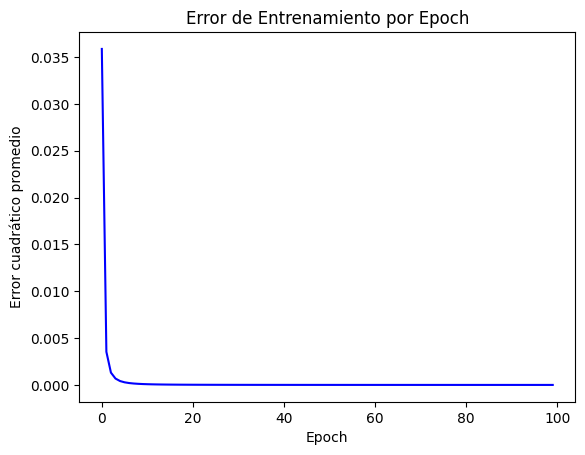

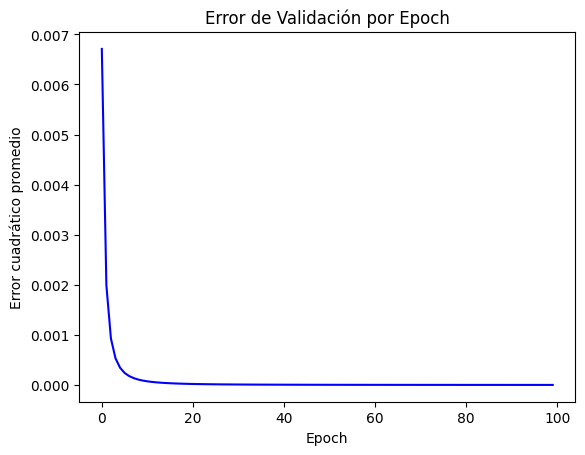

In [28]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [29]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 1]
Probabilidad: 0.9985212919516455
Prediction: 1


In [30]:
# Evaluamos cómo funciona el modelo en el set de validación
predictions = []

## Itera por cada muestra de validación y genera las predicciones binarias
for i in range(len(X_validation)):
    # Realiza la predicción y redondea al entero más cercano
    prediction = perceptron_and.predict(X_validation[i])
    predictions.append(int(round(prediction)))

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[378   0]
 [  0 122]]


In [31]:
# Evaluamos cómo funciona el modelo en el set de test

# Generar el set de test (de forma similar al de validación)
X_test = X_data[5500:]
Y_test = Y_data[5500:]

# Inicializar la lista de predicciones
predictions = []

# Iterar por cada muestra de test guardando las predicciones en una lista
for i in range(len(X_test)):
    # Realizar la predicción y redondear al entero más cercano
    prediction = perceptron_and.predict(X_test[i])
    predictions.append(int(round(prediction)))

# Calcular la matriz de confusión
conf_matrix_test = confusion_matrix(Y_test, predictions)

# Visualizar la matriz de confusión
print("Matriz de Confusión en el conjunto de test:")
print(conf_matrix_test)


Matriz de Confusión en el conjunto de test:
[[382   0]
 [  0 118]]
